In [ ]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # 한글 깨짐 방지
    !sudo apt-get install -y fonts-nanum 
    !sudo fc-cache -fv
    !rm ~/.cache/matplotlib -rf

In [ ]:
# import package
import os
import cv2

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
from random import randint
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as Layers
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils

In [ ]:
# drive.mount
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
"""
아래의 메타데이터를 활용하면 모델 학습에 오류가 계속 생겨 고유 ID를 수기로 입력하는 방향으로 변경

# 랜드마크 별 고유 id를 담은 메타데이터셋 불러오기
df_label = pd.read_csv('...dir/data/label_csv/train_labels_fold.csv')
df_label = df_label[['id', 'landmark_id']]

# 중복 데이터 제거를 위한 id column 조정
for idx, i in enumerate(df_label['id']) :
  df_label['id'][idx] = str(i.split('_')[0])

# 중복 행 제거
df_label.drop_duplicates(keep='first', inplace=True, ignore_index=False)
df_label.reset_index(drop=True, inplace=True)
df_label.head()
"""

In [ ]:
def get_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == 'a':
            label = 0
        elif labels == 'b':
            label = 1
        elif labels == 'c':
            label = 2
        elif labels == 'd':
            label = 3
        elif labels == 'e':
            label = 4
        elif labels == 'f':
            label = 5
        elif labels == 'g':
            label = 6
        elif labels == 'h':
            label = 7
        elif labels == 'i':
            label = 8
        elif labels == 'j':
            label = 9
        elif labels == 'k':
            label = 10
        elif labels == 'l':
            label = 11
        elif labels == 'm':
            label = 12
        elif labels == 'n':
            label = 13
        elif labels == 'o':
            label = 14
        elif labels == 'p':
            label = 15
        elif labels == 'q':
            label = 16
        elif labels == 'r':
            label = 17
        elif labels == 's':
            label = 18
        elif labels == 't':
            label = 19
        elif labels == 'u':
            label = 20
        elif labels == 'v':
            label = 21
        elif labels == 'w':
            label = 22
        elif labels == 'x':
            label = 23
        elif labels == 'y':
            label = 24
        elif labels == 'z':
            label = 25
        elif labels == 'z_a':
            label = 26
        elif labels == 'z_b':
            label = 27
        elif labels == 'z_c':
            label = 28
        elif labels == 'z_d':
            label = 29
        elif labels == 'z_e':
            label = 30
        elif labels == 'z_f':
            label = 31
        elif labels == 'z_g':
            label = 32
        elif labels == 'z_h':
            label = 33
        elif labels == 'z_i':
            label = 34
        elif labels == 'z_j':
            label = 35
        elif labels == 'z_k':
            label = 36
        elif labels == 'z_l':
            label = 37
        elif labels == 'z_m':
            label = 38
        elif labels == 'z_n':
            label = 30
        elif labels == 'z_o':
            label = 40

        for image_file in os.listdir(directory+labels):
            image = cv2.imread(directory+labels+r'/'+image_file)
            image = cv2.resize(image,(150,150))
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images, Labels, random_state=2021)

def get_classlabel(class_code):
    labels = {0:'5D입체영상관', 1:'남구국민체육센터', 2:'뉴코아아울렛울산점', 3:'대현체육관', 4:'동구국민체육센터', 5:'매곡산업단지',
              6:'명촌어린이도서관', 7:'문수국제양궁장', 8:'문수힐링피크닉장', 9:'북구청소년문화의집', 10:'석계서원',
              11:'농소1동도서관', 12:'롯데백화점울산점', 13:'문수월드컵경기장', 14:'성남청소년문화의집', 15:'세이브존울산점',
              16:'꽃바위문화관', 17:'덕신1차시장', 18:'도로교통공단', 19:'목련암', 20:'문수야구장',
              21:'동구평생학습관', 22:'박제상유적', 23:'언양알프스시장', 24:'언양종합상가시장', 25:'옥골시장',
              26:'남구문화원', 27:'동축사', 28:'등억온천단지', 29:'롯데마트진장점', 30:'박상진의사송정역사공원',
              31:'곰장어골목', 32:'국립재난안전연구원', 33:'롯데마트울산점', 34:'만정헌', 35:'삼일사',
              36:'성남프라자', 37:'야음상가시장', 38:'약사동제방유적전시관', 39:'에너지경제연구원', 40:'옥골샘도서관'}
    
    return labels[class_code]

In [ ]:
# 이미지 변환 및 라벨 설정
Images, Labels = get_images('...dir/data/train/')
Images = np.array(Images)
Labels = np.array(Labels)
Images = Images / 255.0

In [ ]:
# 결과 확인 - 랜드마크 수
len(set(Labels))

40

In [ ]:
# 결과 확인 - data shape
print("Shape of Images:", Images.shape)
print("Shape of Labels:", Labels.shape)

Shape of Images: (7694, 150, 150, 3)
Shape of Labels: (7694,)


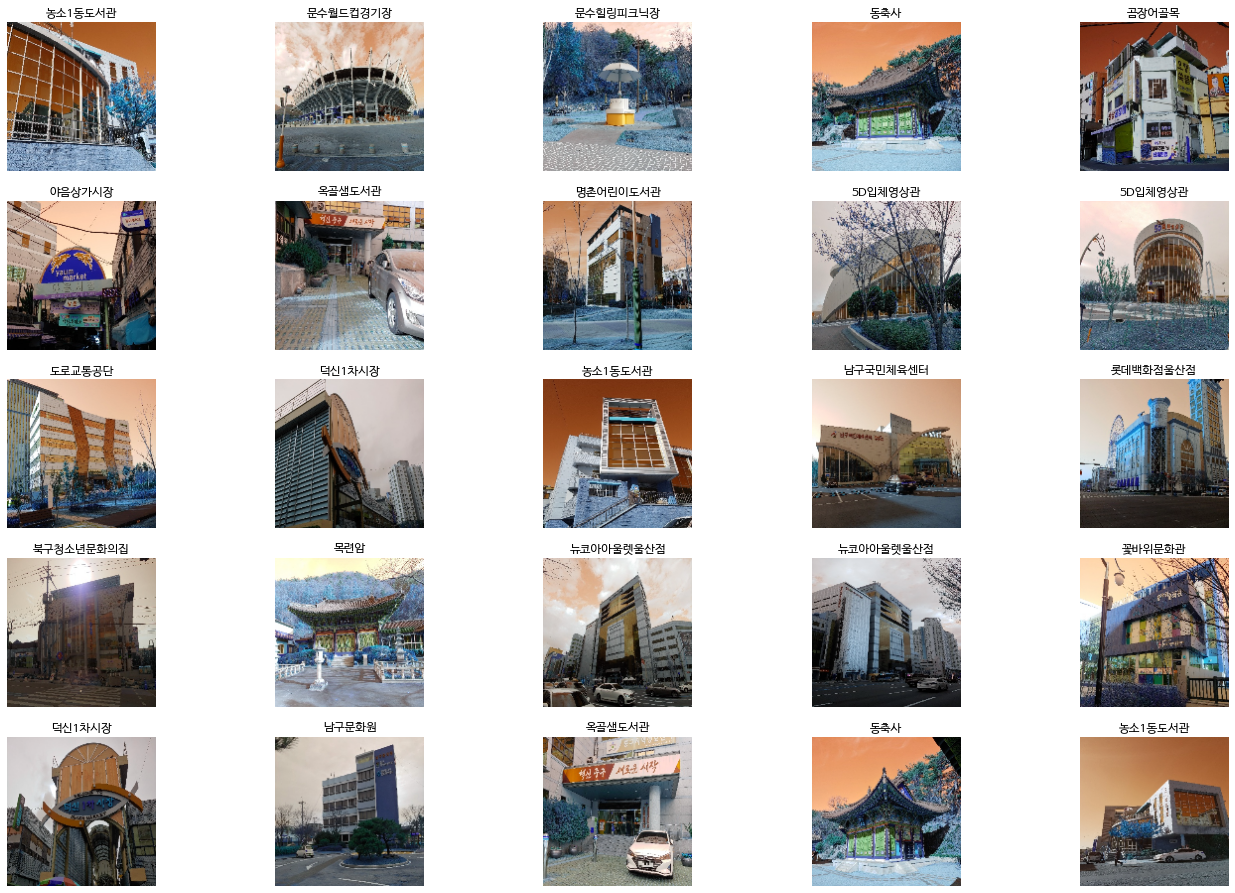

In [ ]:
# 이미지 확인
plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
"""
최초 모델 구축은 Pre-trained 모델을 기반으로 진행하였으나, 원인 모를 오류가 지속적으로 발생하고
오류를 해결하면 성능이 매우 낮게 나와 모델 구성을 변경

from tensorflow.keras.applications import ResNet101
from keras.layers import Dense, Input, Dropout, Conv2D, MaxPool2D
from keras.models import Model
from keras import optimizers

input = Input(shape = (150, 150, 3))
model = ResNet101(input_tensor = input, include_top = False, weights = 'imagenet', pooling = 'max') 
x = model.output
x = Conv2D(3, kernel_size = (3, 3), activation = 'relu', input_shape = (384, 384, 3))(x)
x = MaxPool2D(5, 5)(x)
x = Conv2D(512, kernel_size = (3, 3), activation = 'relu')(x)
x = Conv2D(256, kernel_size = (3, 3), activation = 'relu')(x)
x = Flatten()(x)
x = MaxPool2D(5,5)(x)
x = Dense(256, activation = 'relu')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(rate = 0.3)(x)
x = Dense(11,activation = 'softmax')(x)
model = Model(model.input, x)

for layer in model.layers:
   layer.trainable = False
"""

In [ ]:
# 모델 구축
model = Models.Sequential()
model.add(Layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(Layers.MaxPool2D(5, 5))
model.add(Layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(Layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(Layers.MaxPool2D(5, 5))
model.add(Layers.Flatten())
model.add(Layers.Dense(100, activation = 'relu'))
model.add(Layers.Dense(50, activation = 'relu'))
model.add(Layers.Dense(41, activation = 'softmax'))

# 모델 complie
model.compile(optimizer = Optimizer.Adam(learning_rate = 0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = [keras.metrics.SparseCategoricalAccuracy(name = "accuracy"),
                       keras.metrics.SparseTopKCategoricalAccuracy(3, name = "top3_acc"),
                       keras.metrics.SparseTopKCategoricalAccuracy(5, name = "top5_acc")])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               8

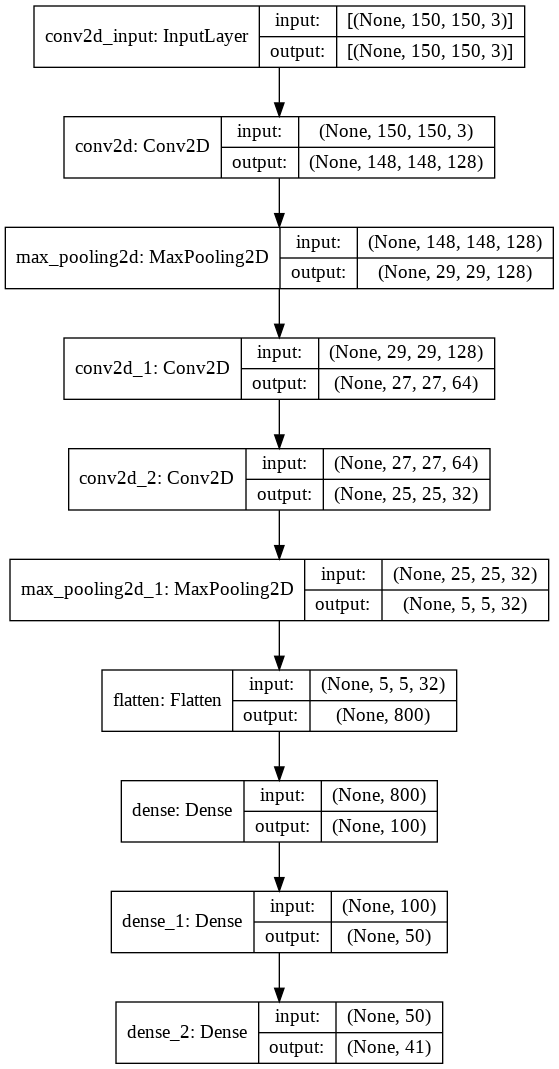

In [ ]:
# 구축 결과 보기
model.summary()
SVG(model_to_dot(model).create(prog = 'dot', format = 'svg'))
Utils.plot_model(model, to_file = 'model.png', show_shapes = True)

In [ ]:
# 모델 학습
trained = model.fit(Images, Labels, epochs = 10, validation_split = 0.20)

Epoch 1/10
193/193 [==============================] - 30s 148ms/step - loss: 3.6163 - accuracy: 0.0546 - top3_acc: 0.1558 - top5_acc: 0.2372 - val_loss: 3.3623 - val_accuracy: 0.1183 - val_top3_acc: 0.2677 - val_top5_acc: 0.3756
Epoch 2/10
193/193 [==============================] - 29s 148ms/step - loss: 2.6130 - accuracy: 0.2897 - top3_acc: 0.5137 - top5_acc: 0.6318 - val_loss: 1.9146 - val_accuracy: 0.4678 - val_top3_acc: 0.7109 - val_top5_acc: 0.8103
Epoch 3/10
193/193 [==============================] - 28s 146ms/step - loss: 1.3417 - accuracy: 0.6440 - top3_acc: 0.8353 - top5_acc: 0.8996 - val_loss: 1.0956 - val_accuracy: 0.7102 - val_top3_acc: 0.8876 - val_top5_acc: 0.9324
Epoch 4/10
193/193 [==============================] - 28s 146ms/step - loss: 0.7479 - accuracy: 0.8122 - top3_acc: 0.9350 - top5_acc: 0.9595 - val_loss: 0.6644 - val_accuracy: 0.8311 - val_top3_acc: 0.9461 - val_top5_acc: 0.9656
Epoch 5/10
193/193 [==============================] - 29s 150ms/step - loss: 0.5039 

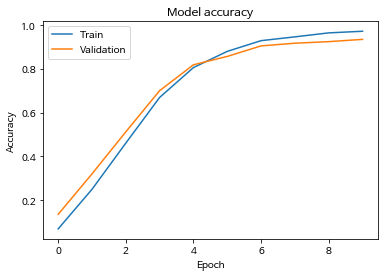

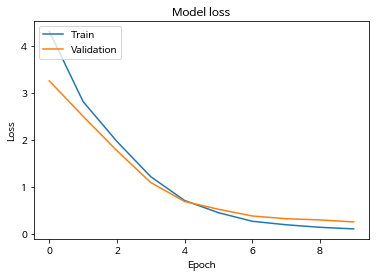

In [ ]:
# 결과 시각화 - accuracy를 중심으로
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Validation'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Validation'], loc='upper left')
plot.show()

In [ ]:
# test 데이터 불러오기
pred_images, no_labels = get_images('/content/drive/MyDrive/Colab Notebooks/Study/Codestate_AI/Project/data/test/')
pred_images = np.array(pred_images)

# test 데이터 형태 확인
pred_images.shape

(837, 150, 150, 3)

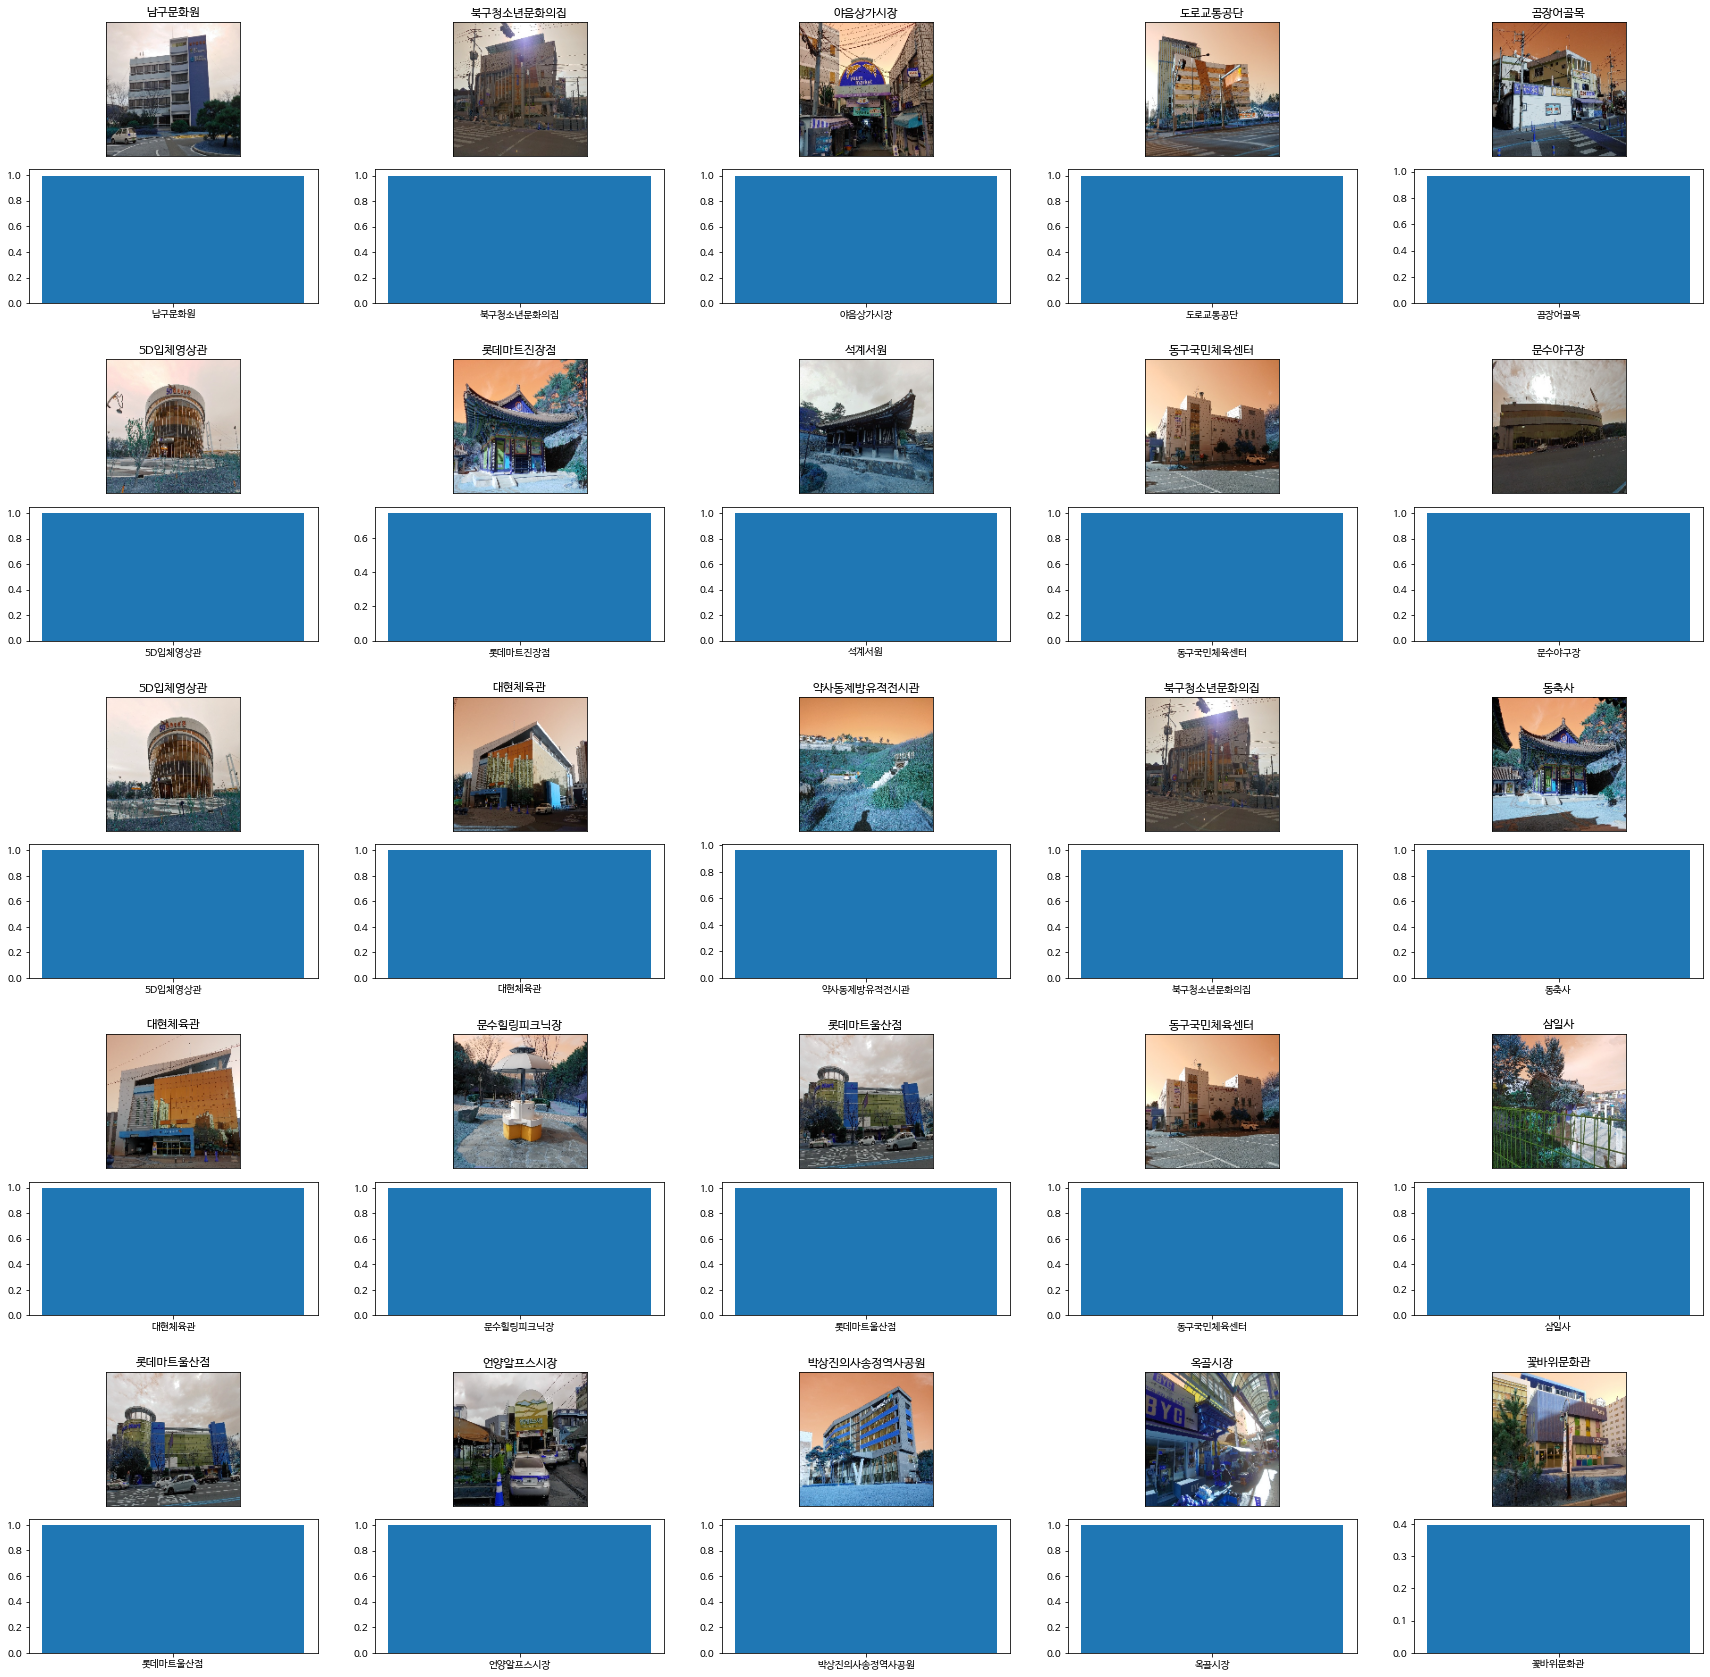

In [ ]:
# 예측 결과 시각화
# 대부분 99% 이상의 확률로 정답 도출
fig = plt.figure(figsize = (30, 30))
outer = gridspec.GridSpec(5, 5, wspace = 0.2, hspace = 0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer[i], wspace = 0.1, hspace = 0.1)
    rnd_number = randint(0, len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_prob = model.predict(pred_image)[0]
    pred_class = get_classlabel(np.argmax(pred_prob))
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar(pred_class, pred_prob, width=0.1)
            fig.add_subplot(ax)

In [ ]:
# 모델 저장
from keras.models import save_model
save_model(model = model, filepath = '...dir/model.h5', overwrite=True, include_optimizer=True)

In [ ]:
# 분석 환경 저장
!pip freeze > requirements.txt